In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext zipline
import zipline

In [3]:
from zipline.api import order_target_percent, record, symbol, set_benchmark, get_open_orders
from datetime import datetime
import pytz

In [4]:
import pyfolio as pf

import os
os.chdir("/home/backstreet/use_zipline/sma_strategy")

from analysis import process_performance, create_benchmark, analyze

In [5]:
import numpy as np

In [6]:
def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')
    set_benchmark(symbol('AAPL'))
    

def handle_data(context, data):
    # Skip first 200 days to get full windows
    context.i += 1
    if context.i < 200:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=50, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=200, frequency="1d").mean()

    # Trading logic
    open_orders = get_open_orders()

    if context.asset not in open_orders:
        if short_mavg > long_mavg:
            # order_target orders as many shares as needed to
            # achieve the desired number of shares.
            order_target_percent(context.asset, 1.0)
        elif short_mavg < long_mavg:
            order_target_percent(context.asset, 0.0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
            short_mavg=short_mavg,
            long_mavg=long_mavg)
    
    

In [7]:
#%zipline --start 2000-1-1 --end 2017-12-31 -o perf.pickle --no-benchmark --capital-base 20000

In [8]:
perf = process_performance('perf')
perf

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 00:00:00+00:00,NaN,NaN,0.000000,NaN,0.089010,NaN,NaN,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,1,[],0.0
2000-01-04 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.003028,1.947812,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,2,[],0.0
2000-01-05 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.011807,1.382169,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,3,[],0.0
2000-01-06 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.075992,1.349523,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,4,[],0.0
2000-01-07 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.032092,1.254860,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,5,[],0.0
2000-01-10 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.049046,1.125805,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,6,[],0.0
2000-01-11 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.097790,1.062626,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,7,[],0.0
2000-01-12 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.151983,1.019136,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,8,[],0.0
2000-01-13 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058734,1.171122,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,9,[],0.0
2000-01-14 00:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.023009,1.124341,0.000000,0.0,20000.00000,0.000,...,NaN,0.0,0,NaN,20000.00000,0.000,0.000,10,[],0.0


Start date,2000-01-03
End date,2017-12-29
Total months,215
,Backtest
Annual return,23.8%
Cumulative returns,4514.9%
Annual volatility,27.9%
Sharpe ratio,0.90
Calmar ratio,0.41
Stability,0.93
Max drawdown,-57.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,57.78,2007-12-28,2008-09-23,2010-09-22,714
1,53.57,2001-07-17,2003-06-09,2004-09-08,822
2,34.42,2006-01-13,2006-10-11,2007-05-21,352
3,25.91,2012-09-19,2013-09-16,2014-05-23,438
4,24.27,2005-02-16,2005-05-12,2005-08-12,128


Stress Events,mean,min,max
Dotcom,0.00%,0.00%,0.00%
Lehman,-0.45%,-8.61%,5.09%
9/11,0.00%,0.00%,0.00%
US downgrade/European Debt Crisis,-0.01%,-5.46%,5.89%
Fukushima,-0.22%,-4.46%,2.61%
US Housing,0.00%,0.00%,0.00%
EZB IR Event,-0.25%,-2.60%,2.43%
Aug07,0.26%,-5.69%,5.73%
Mar08,-0.10%,-2.86%,2.38%
Sept08,-1.19%,-8.61%,5.09%


Top 10 long positions of all time,max
sid,
AAPL,102.87%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,102.87%


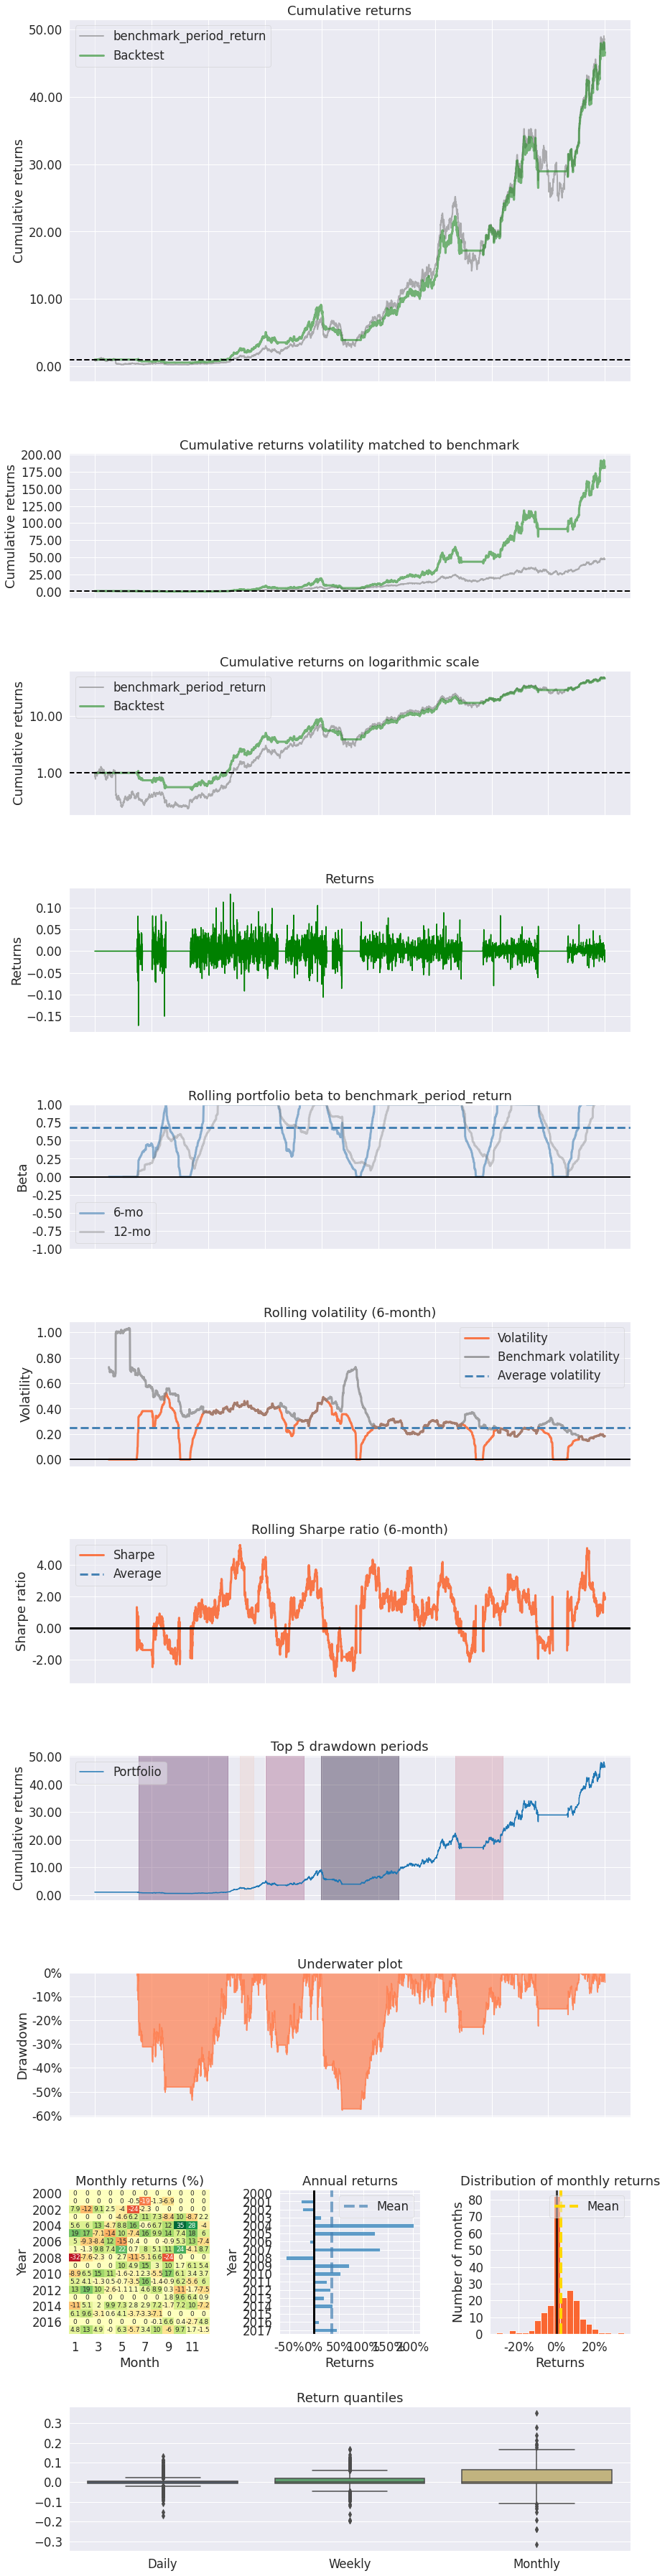

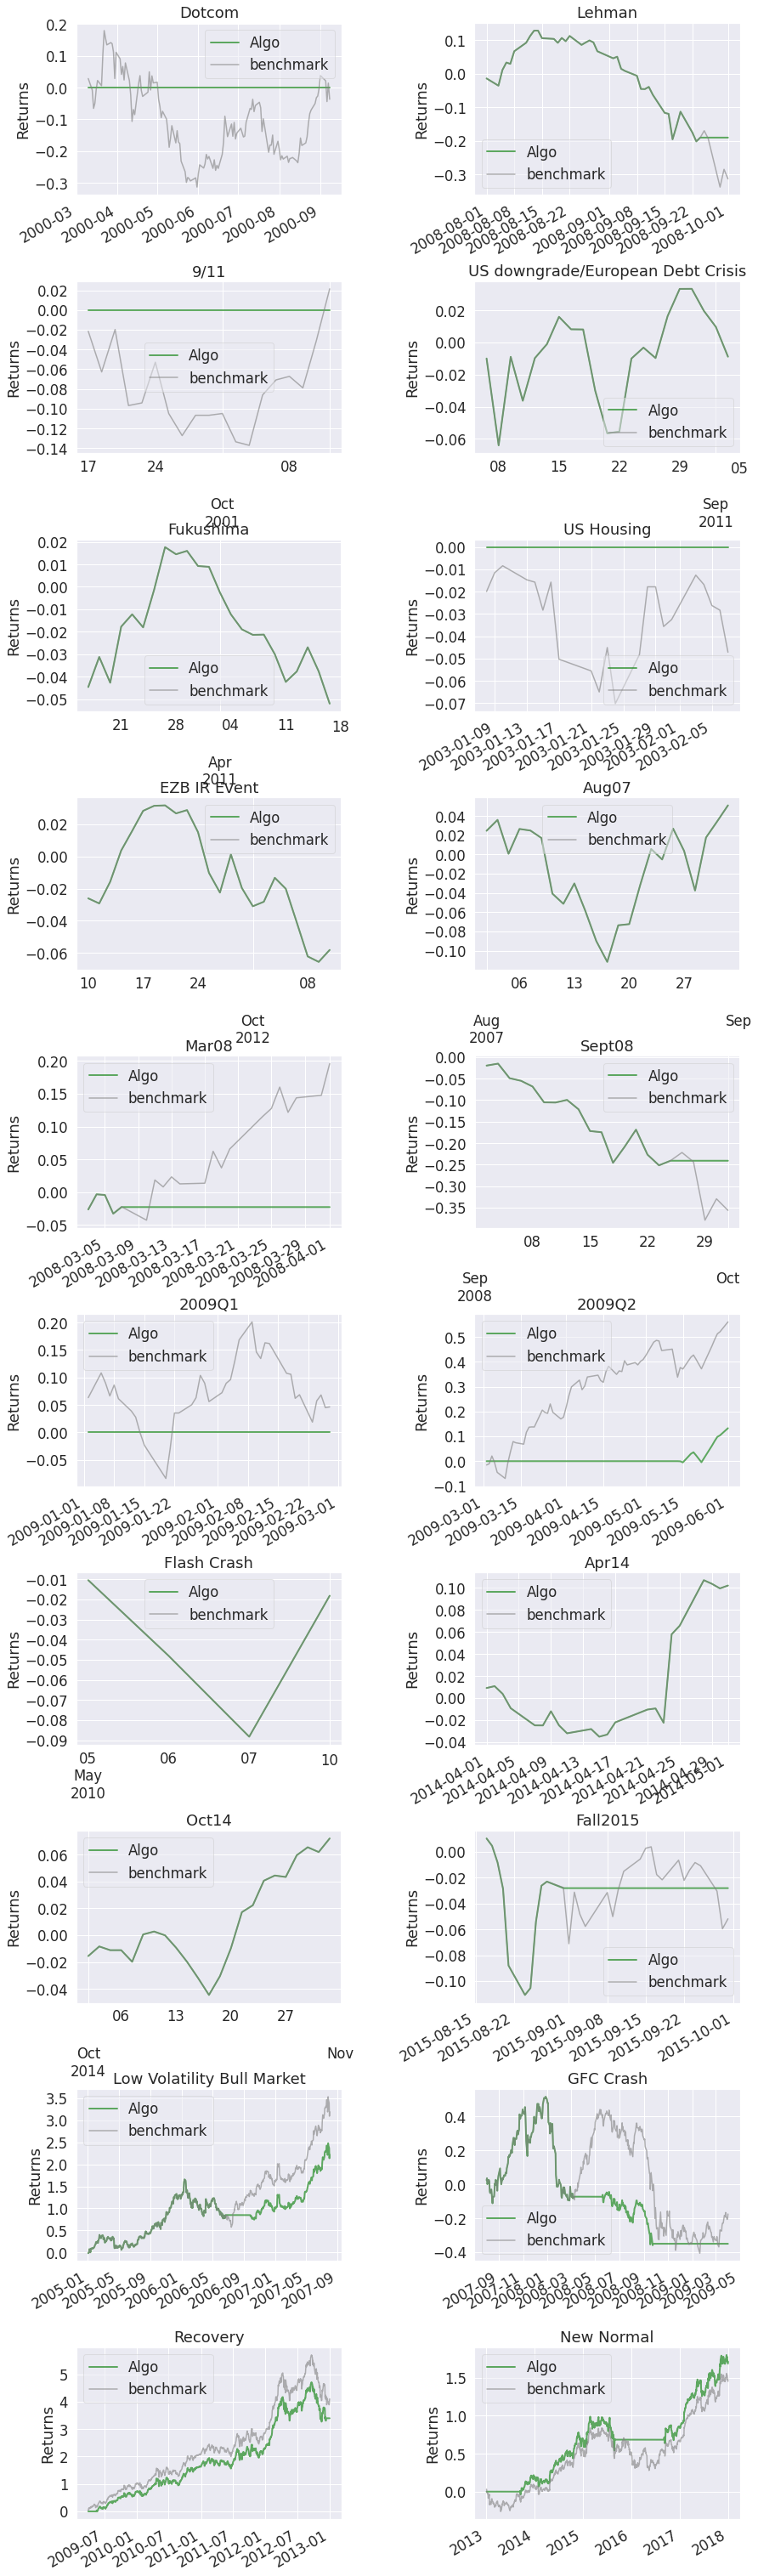

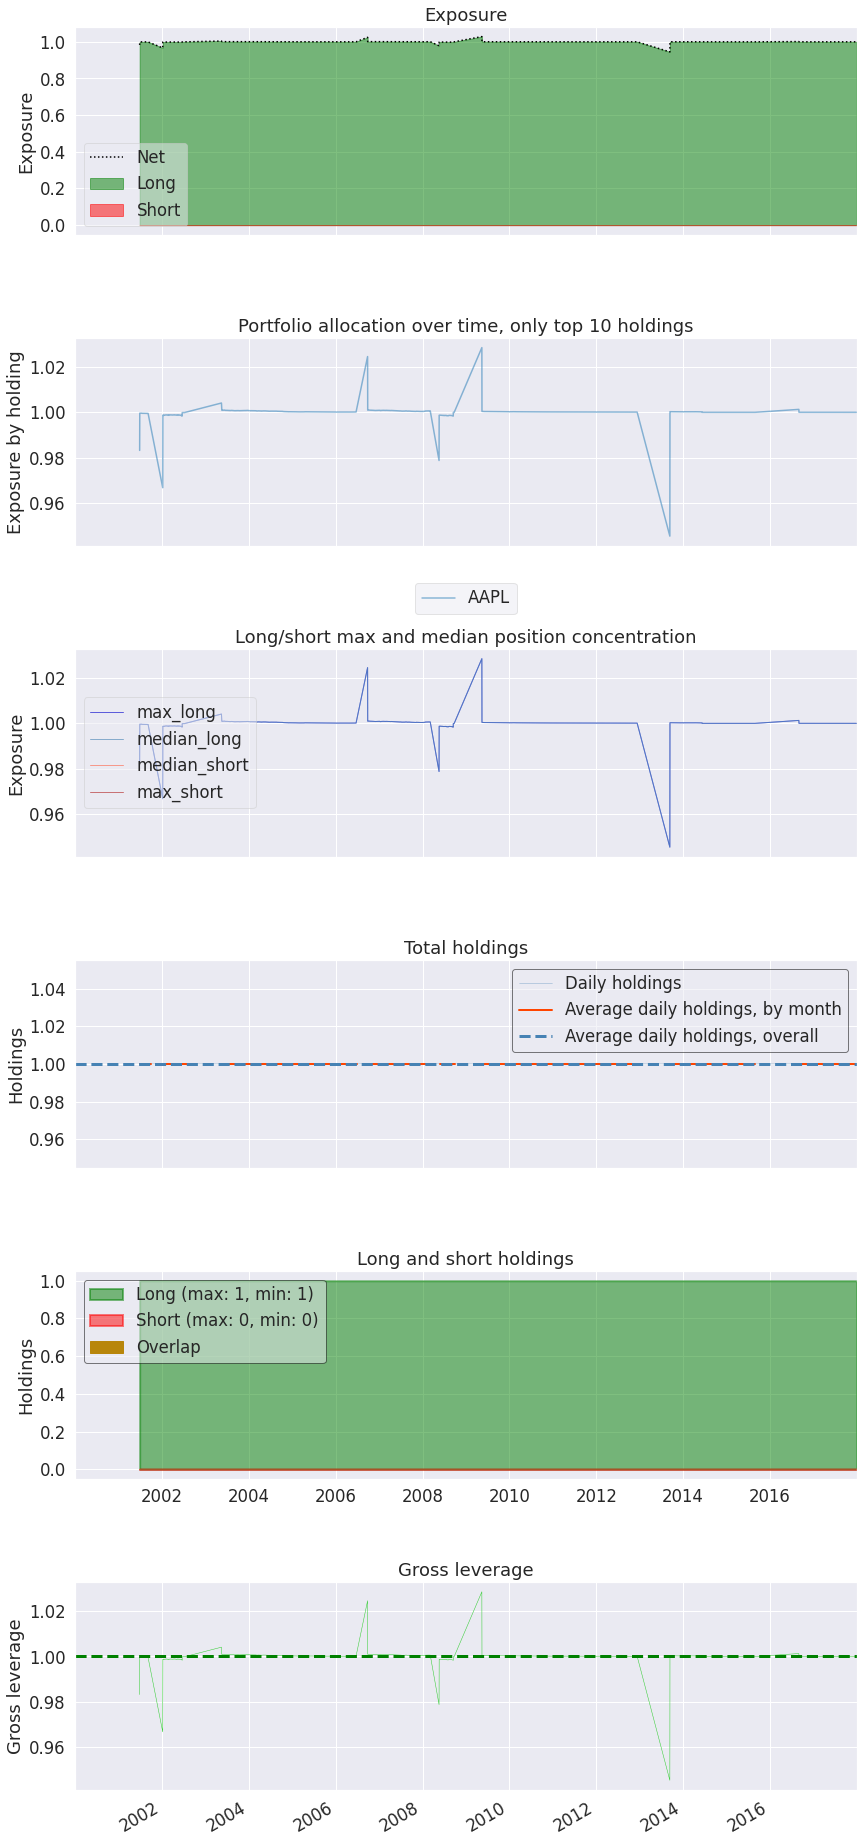

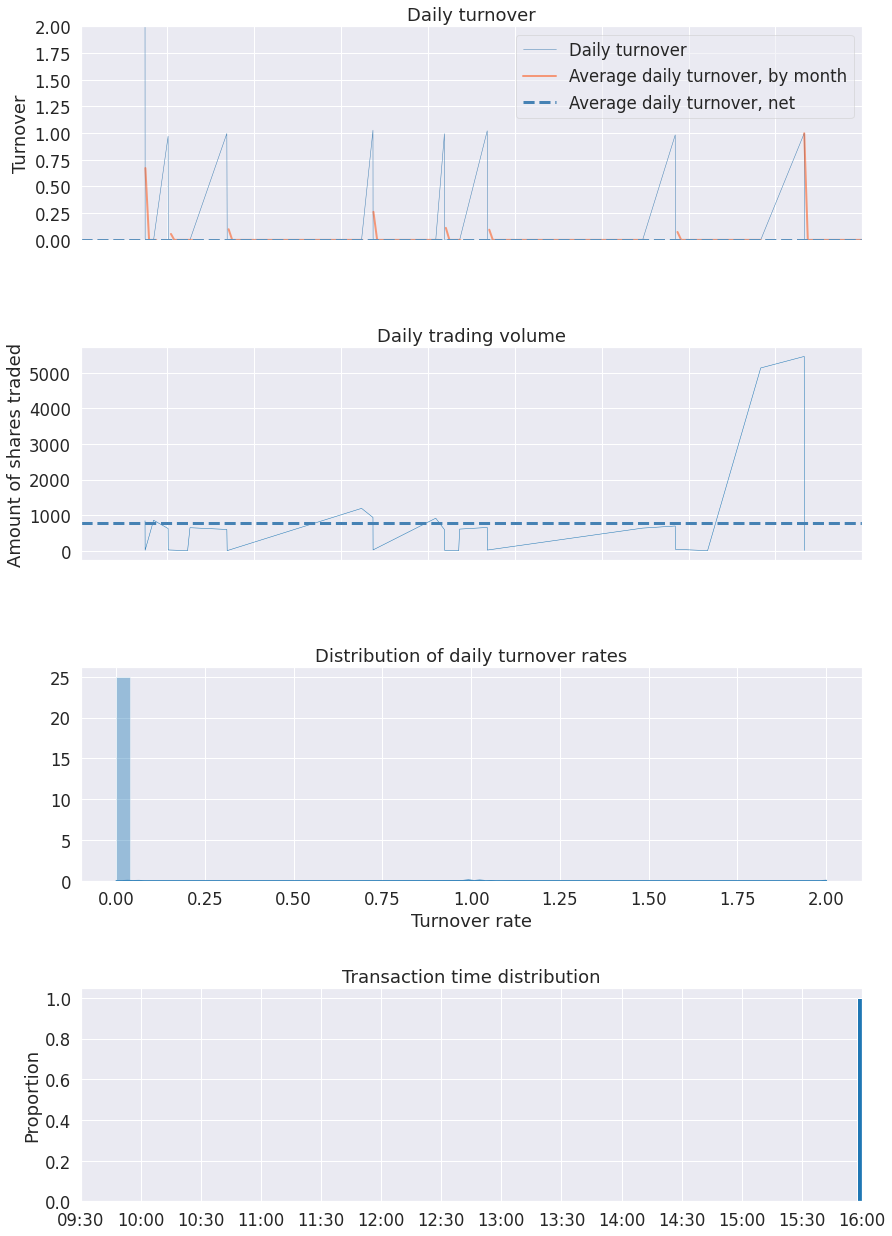

In [9]:
# Extract algo returns and benchmark returns
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
benchmark_period_return = perf['benchmark_period_return']

# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

